# A look at data from OpenDurham
We have a sample of some data from the end of Summer 2019 about the city of Durham, NC. Here we'll check out some basic information by importing it into pandas dataframes, and viewing with matplotlib.

In [1]:
import pandas
import matplotlib.pyplot as plt

In [2]:
DPD_Crime = pandas.read_csv('data/DPD_Crime.csv')
DPD_Crime

,OBJECTID,INCI_ID,DATE_REPT,HOUR_REPT,YEARSTAMP,MONTHSTAMP,REPORTEDAS,UCR_CODE,CHRGDESC,ATTM_COMP,PREMISE,WEAPON,CSSTATUS,DIST,BEAT,ADDRESS2
0,1001,18043007,2018-12-06T15:36:00.000Z,1536,2018,12,MOTOR VEHICLE A,290,VANDALISM,COM,08,99,2,1,121,1500 GLENN SCHOOL RD
1,1002,18043012,2018-12-06T15:37:55.000Z,1537,2018,12,WARRANT OR SUBP,90Z,ALL OTHER OFFENSES-COURT VIOLATIONS,COM,11,,5,5,522,200 S MANGUM ST
2,1003,18043010,2018-12-06T15:41:54.000Z,1541,2018,12,LARCENY,23H,LARCENY - ALL OTHER,COM,RES2,99,1,3,313,500 S LASALLE ST
3,1004,18043013,2018-12-06T15:43:36.000Z,1543,2018,12,SHOPLIFTER,23C,LARCENY - SHOPLIFTING,COM,08,,5,3,321,4000 DURHAM CHAPEL HILL BLVD
4,1005,18043011,2018-12-06T15:44:20.000Z,1544,2018,12,LARCENY,23C,LARCENY - SHOPLIFTING,COM,08,,5,2,223,3500 N ROXBORO ST
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125485,124996,18040595,2018-11-18T09:42:52.000Z,942,2018,11,SUSPICIOUS ACT,9917,DEATH INVESTIGATION,COM,10,95,C,4,421,5600 BARBEE RD/CORONADO LN
125486,124997,18040598,2018-11-18T10:17:15.000Z,1017,2018,11,LARCENY OF VEHI,240,MOTOR VEHICLE THEFT,COM,RES1,,1,2,224,300 CHESAPEAKE AVE
125487,124998,18040597,2018-11-18T10:26:56.000Z,1026,2018,11,LOST OR FOUND P,9919,FOUND PROPERTY,COM,13,99,2,2,214,17600 I85 S
125488,124999,18040601,2018-11-18T11:36:53.000Z,1136,2018,11,LARCENY,23C,LARCENY - SHOPLIFTING,COM,07,99,1,3,314,2700 DURHAM CHAPEL HILL BLVD


In [3]:
DPD_Crime['REPORTEDAS'].unique()

array(['MOTOR VEHICLE A', 'WARRANT OR SUBP', 'LARCENY', 'SHOPLIFTER',
       'ASSIST EMS', 'FRAUD', 'BREAK IN', 'DISTURBANCE', 'HARASSMENT',
       'UNKNOWN PROBLEM', 'BREAK IN VEHICL', 'ARMED ROBBERY',
       'NOTIFY POLICE', 'VANDALISM', 'INTOXICATED DRI', 'ALARM',
       'RAPE NO EMS', 'VEHICLE STOP', 'SUSPICIOUS PERS', 'PRIVATE TOW',
       'WEAPONS VIOLATI', 'DISTURBANCE WIT', 'SUSPICIOUS VEHI',
       'GUNSHOT WOUND N', 'LARCENY OF VEHI', 'CARELESS AND RE', 'ASSAULT',
       'DRUGS', 'LARCENY - ALL O', 'FRAUD - IMPERSO', 'INDECENT',
       'DAMAGE TO PROPE', 'ABANDONED VEHIC', 'LOST OR FOUND P',
       'SEXUAL ASSAULT', 'MOTOR VEHICLE C', 'WANTED PERSON',
       'DOMESTIC VIOLEN', 'WELFARE CHECK', 'LOST PROPERTY',
       'UNAUTHORIZED US', 'FLOOD', 'HOLD UP ALARM', 'DOMESTIC WITH A',
       'HIT AND RUN', 'SUSPICIOUS PACK', 'THREATS', 'ASSIST PERSON',
       'TRESPASS OR UNW', 'COMMON LAW ROBB', 'FLAG DOWN',
       'CARDIAC OR RESP', 'TRAFFIC HAZARD', 'FOLLOW UP', 'STABBING',
   

In [4]:
# Compare this to the charge description
charges = DPD_Crime['CHRGDESC'].unique()
print(charges)
print(charges.size)

['VANDALISM' 'ALL OTHER OFFENSES-COURT VIOLATIONS' 'LARCENY - ALL OTHER'
 'LARCENY - SHOPLIFTING' 'CALLS FOR SERVICE (NO CRIME)' 'EMBEZZLEMENT'
 'FRAUD - CREDIT CARD/ATM' 'BURGLARY' 'LARCENY - FROM BUILDING'
 'SUSPICIOUS ACTIVITY' 'SIMPLE ASSAULT' 'ALL OTHER CRIMINAL OFFENSES'
 'DEATH INVESTIGATION' 'LARCENY - FROM MOTOR VEHICLE'
 'ROBBERY - INDIVIDUAL' 'RECOVERED STOLEN VEHICLE (OTHER JURISDICTION)'
 'DRIVING WHILE IMPAIRED' 'SEX OFFENSE - SEXUAL ASSAULT WITH AN OBJECT'
 'AGGRAVATED ASSAULT' 'DRUG/NARCOTIC VIOLATIONS' 'TOWED/ABANDONED VEHICLE'
 'FOUND PROPERTY' 'MOTOR VEHICLE THEFT' 'SEX OFFENSE - FONDLING'
 'SEX OFFENSE - STATUTORY RAPE' 'FRAUD - IMPERSONATION'
 'FRAUD - FALSE PRETENSE' 'PORNOGRAPHY/OBSCENE MATERIAL' 'INTIMIDATION'
 'BLACKMAIL/EXTORTION' 'SEX OFFENSE - FORCIBLE SODOMY'
 'COUNTERFEITING/FORGERY'
 'ALL OTHER OFFENSES-ESCAPE FROM CUSTODY OR RESIST ARREST'
 'ASSIST OTHER AGENCY' 'LOST PROPERTY' 'TRESPASSING'
 'FRAUD - UNAUTHORIZED USE OF CONVEYANCE' 'DISORDERLY CONDUCT'


In [5]:
# Let's first find out the time period when these crimes were reported
first_report = DPD_Crime['DATE_REPT'].min()
latest_report = DPD_Crime['DATE_REPT'].max()
print(first_report)
print(latest_report)

2015-01-01T00:00:00.000Z
2019-08-02T23:50:00.000Z


So this data covers the range from January 1st, 2015 to August 2nd, 2019

In [6]:
# How many bank robberies were there?
robberies = DPD_Crime[DPD_Crime.REPORTEDAS == 'BANK ROBBERY']
robberies.count()

OBJECTID      30
INCI_ID       30
DATE_REPT     30
HOUR_REPT     30
YEARSTAMP     30
MONTHSTAMP    30
REPORTEDAS    30
UCR_CODE      30
CHRGDESC      30
ATTM_COMP     30
PREMISE       30
WEAPON        30
CSSTATUS      30
DIST          30
BEAT          30
ADDRESS2      30
dtype: int64

In [7]:
# How many reported explosions?
explosions = DPD_Crime[DPD_Crime.REPORTEDAS == 'EXPLOSION']
explosions

,OBJECTID,INCI_ID,DATE_REPT,HOUR_REPT,YEARSTAMP,MONTHSTAMP,REPORTEDAS,UCR_CODE,CHRGDESC,ATTM_COMP,PREMISE,WEAPON,CSSTATUS,DIST,BEAT,ADDRESS2
1008,9,18041392,2018-11-25T00:40:36.000Z,40,2018,11,EXPLOSION,520,WEAPON VIOLATIONS,COM,RES3,14,5,2,224,5700 WHIPPOORWILL ST
21137,23138,15002974,2015-01-27T00:38:15.000Z,38,2015,1,EXPLOSION,200,ARSON,COM,18,,2,1,124,2400 KATE ST
106162,105163,18007462,2018-03-07T22:53:43.000Z,2253,2018,3,EXPLOSION,200,ARSON,COM,20,,2,1,114,1200 EVA ST


## Clean the data a little bit
As you can see in the cell below, the dates between date reported, and yearstamp don't always agree. In fact it looks like there are over 1100 rows with a yearstamp of 0. Let's fix this.

In [8]:
by_year = DPD_Crime.groupby(['YEARSTAMP','DATE_REPT'])
by_year.count()

OBJECTID  INCI_ID  HOUR_REPT  MONTHSTAMP  \
YEARSTAMP DATE_REPT                                                            
0         2017-01-20T00:00:00.000Z         2        2          2           2   
          2017-01-21T00:00:00.000Z         1        1          1           1   
          2017-01-22T00:00:00.000Z         2        2          2           2   
          2017-01-23T00:00:00.000Z         1        1          1           1   
          2017-01-24T00:00:00.000Z         3        3          3           3   
...                                      ...      ...        ...         ...   
2019      2019-08-02T18:42:00.000Z         1        1          1           1   
          2019-08-02T21:13:00.000Z         1        1          1           1   
          2019-08-02T23:10:00.000Z         1        1          1           1   
          2019-08-02T23:42:00.000Z         1        1          1           1   
          2019-08-02T23:50:00.000Z         1        1          1           1   

                                    REPORTEDAS  UCR_CODE  CHRGDESC  ATTM_COMP  \
YEARSTAMP DATE_REPT                                                             
0         2017-01-20T00:00:00.000Z           2         2         2          2   
          2017-01-21T00:00:00.000Z           1         1         1          1   
          2017-01-22T00:00:00.000Z           2         2         2          2   
          2017-01-23T00:00:00.000Z           1         1         1          1   
          2017-01-24T00:00:00.000Z           3         3         3          3   
...                                        ...       ...       ...        ...   
2019      2019-08-02T18:42:00.000Z           1         1         1          1   
          2019-08-02T21:13:00.000Z           1         1         1          1   
          2019-08-02T23:10:00.000Z           1         1         1          1   
          2019-08-02T23:42:00.000Z           1         1         1          1   
          2019-08-02T23:50:00.000Z           1         1         1          1   

                                    PREMISE  WEAPON  CSSTATUS  DIST  BEAT  \
YEARSTAMP DATE_REPT                                                         
0         2017-01-20T00:00:00.000Z        2       2         2     2     2   
          2017-01-21T00:00:00.000Z        1       1         1     1     1   
          2017-01-22T00:00:00.000Z        2       2         2     2     2   
          2017-01-23T00:00:00.000Z        1       1         1     1     1   
          2017-01-24T00:00:00.000Z        3       3         3     3     3   
...                                     ...     ...       ...   ...   ...   
2019      2019-08-02T18:42:00.000Z        1       1         1     1     1   
          2019-08-02T21:13:00.000Z        1       1         1     1     1   
          2019-08-02T23:10:00.000Z        1       1         1     1     1   
          2019-08-02T23:42:00.000Z        1       1         1     1     1   
          2019-08-02T23:50:00.000Z        1       1         1     1     1   

                                    ADDRESS2  
YEARSTAMP DATE_REPT                           
0         2017-01-20T00:00:00.000Z         2  
          2017-01-21T00:00:00.000Z         1  
          2017-01-22T00:00:00.000Z         2  
          2017-01-23T00:00:00.000Z         1  
          2017-01-24T00:00:00.000Z         3  
...                                      ...  
2019      2019-08-02T18:42:00.000Z         1  
          2019-08-02T21:13:00.000Z         1  
          2019-08-02T23:10:00.000Z         1  
          2019-08-02T23:42:00.000Z         1  
          2019-08-02T23:50:00.000Z         1  

[121795 rows x 14 columns]

In [9]:
# Get a boolean series for each year of our data, where the reported date contains that year
rows_2015 = DPD_Crime.DATE_REPT.str.contains("2015")
rows_2016 = DPD_Crime.DATE_REPT.str.contains("2016")
rows_2017 = DPD_Crime.DATE_REPT.str.contains("2017")
rows_2018 = DPD_Crime.DATE_REPT.str.contains("2018")
rows_2019 = DPD_Crime.DATE_REPT.str.contains("2019")
rows_2015

0         False
1         False
2         False
3         False
4         False
          ...  
125485    False
125486    False
125487    False
125488    False
125489    False
Name: DATE_REPT, Length: 125490, dtype: bool

In [10]:
# Now update values in the "YEARSTAMP" column to match the boolean series we just created
DPD_Crime.loc[rows_2015,"YEARSTAMP"] = 2015
DPD_Crime.loc[rows_2016,"YEARSTAMP"] = 2016
DPD_Crime.loc[rows_2017,"YEARSTAMP"] = 2017
DPD_Crime.loc[rows_2018,"YEARSTAMP"] = 2018
DPD_Crime.loc[rows_2019,"YEARSTAMP"] = 2019
Corrected_years = DPD_Crime.groupby(["YEARSTAMP"])
Corrected_years.count()

,OBJECTID,INCI_ID,DATE_REPT,HOUR_REPT,MONTHSTAMP,REPORTEDAS,UCR_CODE,CHRGDESC,ATTM_COMP,PREMISE,WEAPON,CSSTATUS,DIST,BEAT,ADDRESS2
YEARSTAMP,,,,,,,,,,,,,,,
2015,24741,24741,24741,24741,24741,24672,24741,24741,24741,24741,24741,24741,24739,24679,24741
2016,27550,27550,27550,27550,27550,27315,27550,27550,27550,27550,27550,27550,27548,27353,27550
2017,27225,27225,27225,27225,27225,27129,27225,27225,27225,27225,27225,27225,27220,27065,27225
2018,27583,27583,27583,27583,27583,27493,27583,27583,27583,27583,27583,27583,27581,27449,27583
2019,18391,18391,18391,18391,18391,18344,18391,18391,18391,18391,18391,18391,18391,18281,18391


## Plotting some basic info about crimes in the city
Let's compare the change in number and rate of a few crimes over the years. For the rates, we will need some population data (or at least some very good guessing).

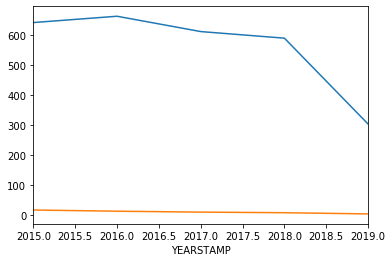

In [27]:
indiv_robberies = DPD_Crime[DPD_Crime["CHRGDESC"].str.contains("ROBBERY - INDIVIDUAL")]
pursesnatching =  DPD_Crime[DPD_Crime["CHRGDESC"].str.contains("LARCENY - PURSESNATCHING")]
indiv_robberies.groupby(["YEARSTAMP"]).count()["OBJECTID"].plot()
pursesnatching.groupby(["YEARSTAMP"]).count()["OBJECTID"].plot()